In [3]:
import matplotlib
matplotlib.use('TkAgg')
from pylab import *
import networkx as nx
import random as rd

def initialize():
    global g
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < .5 else 0

def observe():
    global g
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

def update():
    global g
    listener = rd.choice(list(g.nodes))
    speaker = rd.choice(list(g.neighbors(listener)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']
    sum_of_states = 0
    for i in g.nodes:
        sum_of_states+=g.nodes[i]['state']
    return sum_of_states
    

import pycxsimulator
pycxsimulator.GUI().start(func=[initialize, observe, update2])

In [8]:
times = []
for i in range(1000):
    initialize()
    count = 0
    while update() > 0 and update() <34:
        update()
        count += 1
    times.append(count)

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.hist(times, edgecolor='black', color='cornflowerblue')
plt.ylabel('Frequency')
plt.xlabel('Number of steps')
plt.show()

KeyboardInterrupt: 

The average number of steps it took to reach consensus for listener-first model is: 344.64


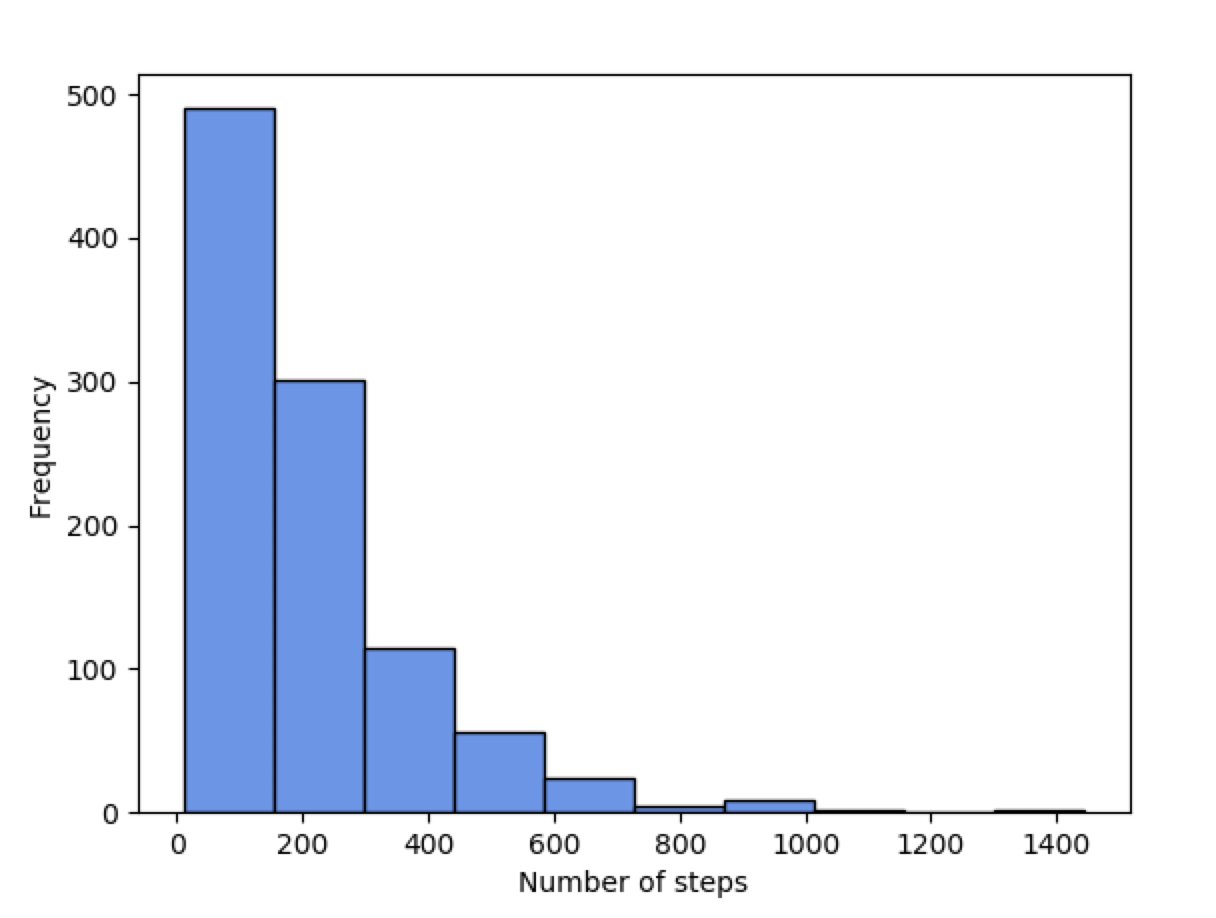

In [44]:
print('The average number of steps it took to reach consensus for listener-first model is:', round(np.mean(times), 2))
from IPython.display import Image
Image("Screen Shot 2021-03-15 at 2.26.06 PM.png")

In [2]:
def update2():
    global g
    speaker = rd.choice(list(g.nodes))
    listener = rd.choice(list(g.neighbors(speaker)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']
    sum_of_states = 0
    for i in g.nodes:
        sum_of_states+=g.nodes[i]['state']
    return sum_of_states

In [53]:
times2 = []
for i in range(1000):
    initialize()
    count = 0
    while update2() > 0 and update2() <34:
        update2()
        count += 1
    times2.append(count)

In [49]:
plt.figure()
plt.hist(times2, edgecolor='black', color='cornflowerblue')
plt.ylabel('Frequency')
plt.xlabel('Number of steps')
plt.show()

KeyboardInterrupt: 

The average number of steps it took to reach consensus for speaker-first model is: 1239.69


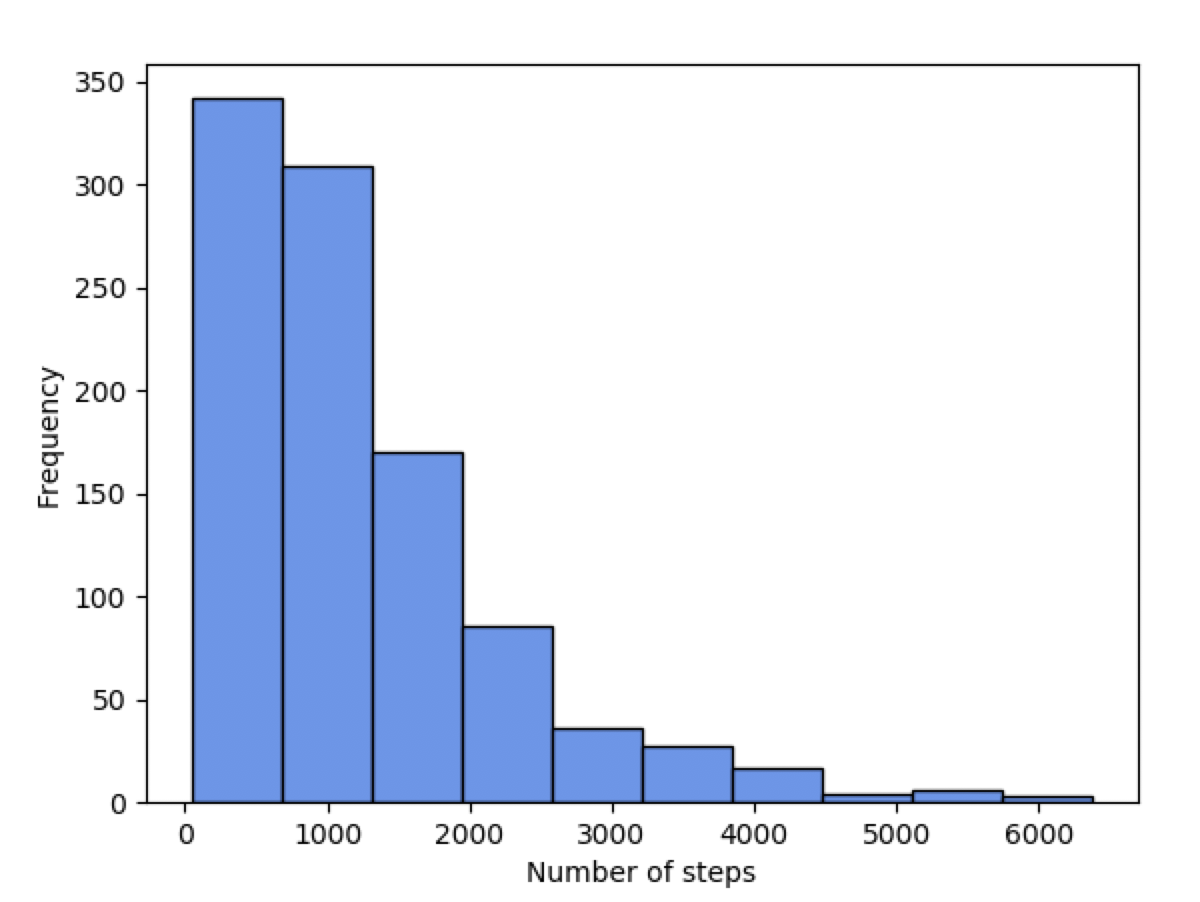

In [50]:
print('The average number of steps it took to reach consensus for speaker-first model is:', round(np.mean(times2), 2))
from IPython.display import Image
Image("Screen Shot 2021-03-15 at 3.35.44 PM.png")

In [35]:
def update3():
    global g
    edge = rd.choice(list(g.edges))
    listener = rd.choice(list(edge))
    if edge[0] == listener:
        speaker = edge[1]
    else:
        speaker = edge[0]
    g.nodes[listener]['state'] = g.nodes[speaker]['state']
    sum_of_states = 0
    for i in g.nodes:
        sum_of_states+=g.nodes[i]['state']
    return sum_of_states

In [40]:
times3 = []
for i in range(1000):
    initialize()
    count = 0
    while update3() > 0 and update3() <34:
        update3()
        count += 1
    times3.append(count)

In [41]:
plt.figure()
plt.hist(times3, edgecolor='black', color='cornflowerblue')
plt.ylabel('Frequency')
plt.xlabel('Number of steps')
plt.show()

KeyboardInterrupt: 

The average number of steps it took to reach consensus for edge-based model is: 336.61


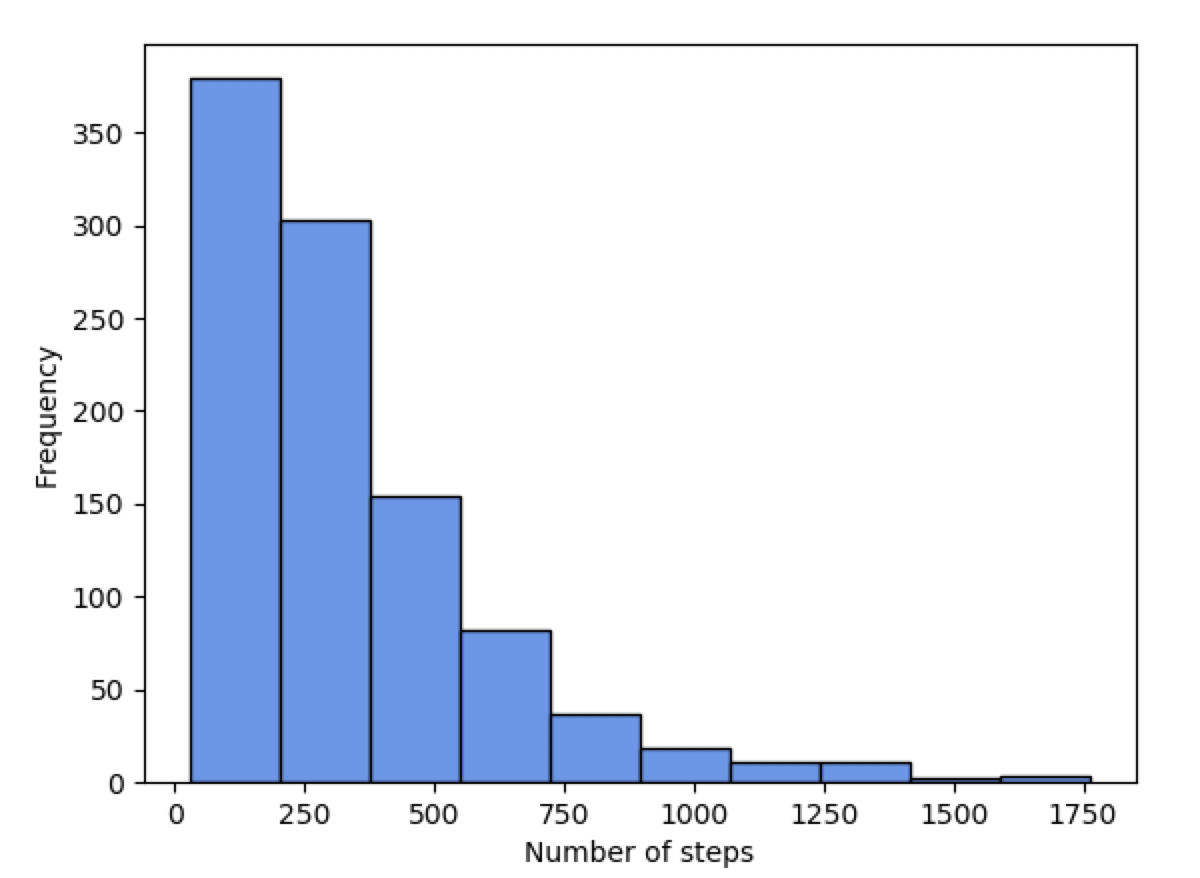

In [43]:
print('The average number of steps it took to reach consensus for edge-based model is:', round(np.mean(times3), 2))
from IPython.display import Image
Image("Screen Shot 2021-03-15 at 3.29.00 PM.png")

As we can see, for listener-first and edge-based models the time it takes for the graph to reach consensus is much smaller (four times) compared to speaker-first model - I an not sure why this happens, potentially due to clustering of nodes of a certain color which makes it less likely that they will converge to the color which prevails.